In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages

from importlib import reload

from icedef import drift, metocean, simulator, plot, iceberg, test_case
from icedef import statoil_arcticnet_data as sd

reload(drift)
reload(metocean)
reload(simulator)
reload(plot)
reload(iceberg)
reload(test_case)
reload(sd)

<module 'icedef.statoil_arcticnet_data' from '/home/evankielley/IceDEF/icedef/statoil_arcticnet_data.py'>

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# 20180928

# Read in Beacon Data 

In [3]:
df = sd.get_df(sd.dir_path + sd.csv_filenames[1])
df.head()

,BeaconID,BeaconType,DataDate_UTC,TransmissionDate_UTC,Latitude,Longitude,VBatt,AT,ST,BP,Heading,Speed,LocAccuracy,MessageIndex,Satellites,GPSdelay,SNR,TTFF
0,50519,Solara,2015-04-23 18:48:37,NaN,49.22403,-51.25820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50519,Solara,2015-04-23 18:49:07,NaN,49.22401,-51.25817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50519,Solara,2015-04-23 18:49:34,NaN,49.22400,-51.25809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50519,Solara,2015-04-23 18:49:59,NaN,49.22403,-51.25789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50519,Solara,2015-04-23 18:50:26,NaN,49.22399,-51.25789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Simulation

In [4]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


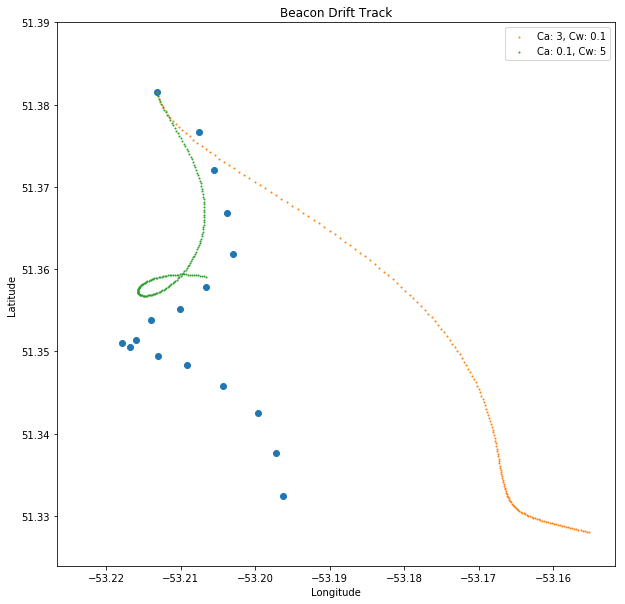

In [5]:
plt.scatter(tc.ref_lons, tc.ref_lats)

sim = simulator.Simulator()

sim.start_latitude = start_latitude
sim.start_longitude = start_longitude
sim.start_time = start_time
sim.end_time = end_time

Ca, Cw = 3, 0.1
label = f'Ca: {Ca}, Cw: {Cw}'
run_sim_kwargs = {'start_velocity': start_velocity, 'Ca': Ca, 'Cw': Cw}
results = sim.run_simulation(store_results_as=label, **run_sim_kwargs)
plt.scatter(results['longitude'], results['latitude'], s=1, label=label)

Ca, Cw = 0.1, 5
label = f'Ca: {Ca}, Cw: {Cw}'
run_sim_kwargs = {'start_velocity': start_velocity, 'Ca': Ca, 'Cw': Cw}
results = sim.run_simulation(store_results_as=label, **run_sim_kwargs)
plt.scatter(results['longitude'], results['latitude'], s=1, label=label)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Beacon Drift Track')
plt.show()


In [6]:
data = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy'])

In [7]:
len(data)

179

In [8]:
ds = sim.results['Ca: 0.1, Cw: 5']

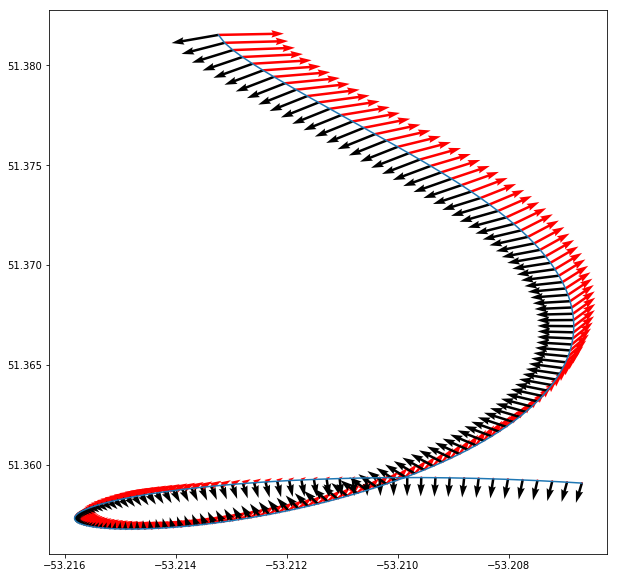

In [9]:
plt.plot(ds['longitude'], ds['latitude'])
plt.quiver(ds['longitude'], ds['latitude'], data['Fax'], data['Fay'], color='red')
plt.quiver(ds['longitude'], ds['latitude'], data['Fcx'], data['Fcy'])

## Plot stereographically

In [10]:
my_plot = plot.Plot()

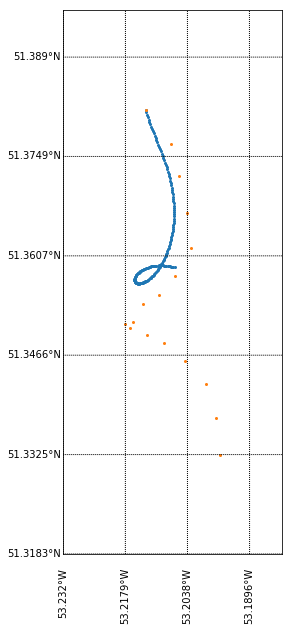

In [11]:
my_plot.plot_track(
    [results['latitude'].values, results['longitude'].values], 
    [tc.ref_lats.values, tc.ref_lons.values],
    s=4
)

# Optimization

In [12]:
reload(simulator)

<module 'icedef.simulator' from '/home/evankielley/IceDEF/icedef/simulator.py'>

In [13]:
keys = ['Ca', 'Cw']
x0 = [1, 1]
bounds = [[1, 10], [1,10]]
reference_vectors = [tc.ref_lats, tc.ref_lons]

sim = simulator.Simulator()
sim.start_latitude = start_latitude
sim.start_longitude = start_longitude
sim.start_time = start_time
sim.end_time = end_time

optimization_result = sim.run_optimization(keys, x0, bounds, reference_vectors)

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560

In [14]:
optimization_result

      fun: 0.008472958905718028
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00062478, -0.00010841])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 8
   status: 0
  success: True
        x: array([ 1., 10.])

## Simulation with Optimization Result

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


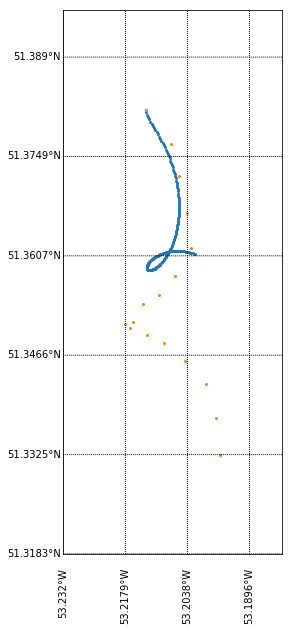

In [18]:
Ca, Cw = optimization_result.x

run_sim_kwargs = {'start_velocity': start_velocity, 'Ca': Ca, 'Cw': Cw}
results = sim.run_simulation(**run_sim_kwargs)

my_plot.plot_track(
    [results['latitude'].values, results['longitude'].values], 
    [ref_lats.values, ref_lons.values],
    s=4
)

# Surface Optimization

In [19]:
Ca_num = 3
Cw_num = 3
Ca_lower_bound = 1; Ca_upper_bound = 5
Cw_lower_bound = 5; Cw_upper_bound = 16

scaling = 'lin'

if scaling == 'log':

    Ca_vec = np.logspace(np.log10(Ca_lower_bound), np.log10(Ca_upper_bound), num=Ca_num)
    Cw_vec = np.logspace(np.log10(Cw_lower_bound), np.log10(Cw_upper_bound), Cw_num=num)

elif scaling == 'lin':
    
    Ca_vec = np.linspace(Ca_lower_bound, Ca_upper_bound, Ca_num)
    Cw_vec = np.linspace(Cw_lower_bound, Cw_upper_bound, Cw_num)


Ca_mesh, Cw_mesh = np.meshgrid(Ca_vec, Cw_vec)

In [20]:
mse_matrix = np.zeros((Ca_num, Cw_num))
keys = ['Ca', 'Cw']
reference_vectors = [tc.ref_lats, tc.ref_lons]

for i in range(Ca_num):
    for j in range(Cw_num):
        form_drag_coefficients = (Ca_mesh[i][j], Cw_mesh[i][j])
        mse_matrix[i][j] = sim.optimization_wrapper(form_drag_coefficients, keys, reference_vectors)

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560

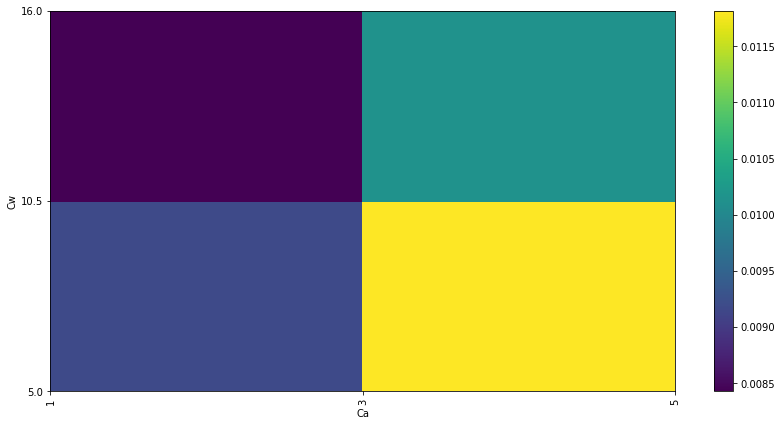

In [21]:
fig = plt.figure(figsize=(14,7))

plt.pcolormesh(Ca_vec, Cw_vec, mse_matrix)#, vmin=0.02525, vmax=0.02675)

plt.xticks(Ca_vec, rotation='vertical')
plt.yticks(Cw_vec)

plt.xlabel('Ca')
plt.ylabel('Cw')

plt.colorbar()

plt.show()

# 20181011

In [22]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats

# Ekman

In [27]:
# No Ekman
ekman = False
kwargs = {'start_velocity': start_velocity, 'ekman': ekman}
xds = sim.run_simulation(store_results_as='no_ekman', **kwargs)

# Ekman to depth of 100 m
ekman = True
kwargs = {'start_velocity': start_velocity, 'ekman': ekman}
xds = sim.run_simulation(store_results_as='ekman_100', **kwargs)

# Ekman to depth of 1000 m
ekman = True
depth_vec = np.arange(0, -1100, -100)
kwargs = {'start_velocity': start_velocity, 'ekman': ekman, 'depth_vec': depth_vec}
xds = sim.run_simulation(store_results_as='ekman_1000', **kwargs)

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


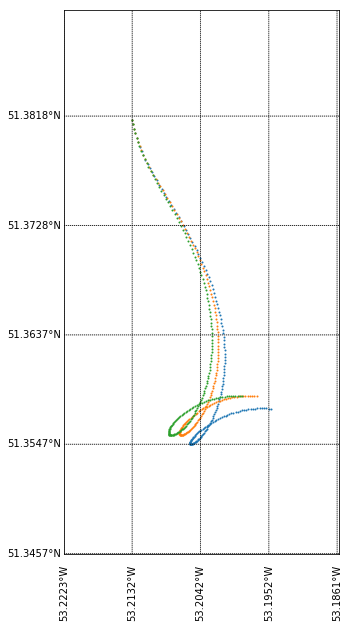

In [28]:
my_plot.plot_track([sim.results['no_ekman']['latitude'].values, sim.results['no_ekman']['longitude'].values], 
                   [sim.results['ekman_100']['latitude'].values, sim.results['ekman_100']['longitude'].values], 
                   [sim.results['ekman_1000']['latitude'].values, sim.results['ekman_1000']['longitude'].values])

# Testing Drift Model with Constant Metocean Fields

In [29]:
sim = simulator.Simulator()

sim.start_latitude = start_latitude
sim.start_longitude = start_longitude
sim.start_time = start_time
sim.end_time = end_time

my_plot = plot.Plot()

## Default

In [30]:
xds = sim.run_simulation(store_results_as='default')

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


In [31]:
forces = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy'])

In [32]:
arrow_colors = ['red', 'blue', 'green', 'black']
arrow_labels = ['Air', 'Water', 'Coriolis', 'Pressure']

vectors = [[forces['Fax'], forces['Fay']], [forces['Fwx'], forces['Fwy']],
          [forces['Fcx'], forces['Fcy']], [forces['Fwpx'], forces['Fwpy']]]

arrow_scale = 1e6
autoscale_figure = False
kwargs = {'vectors': vectors, 'arrow_colors': arrow_colors, 'arrow_labels': arrow_labels, 
          'autoscale_figure': autoscale_figure, 'arrow_scale': arrow_scale}


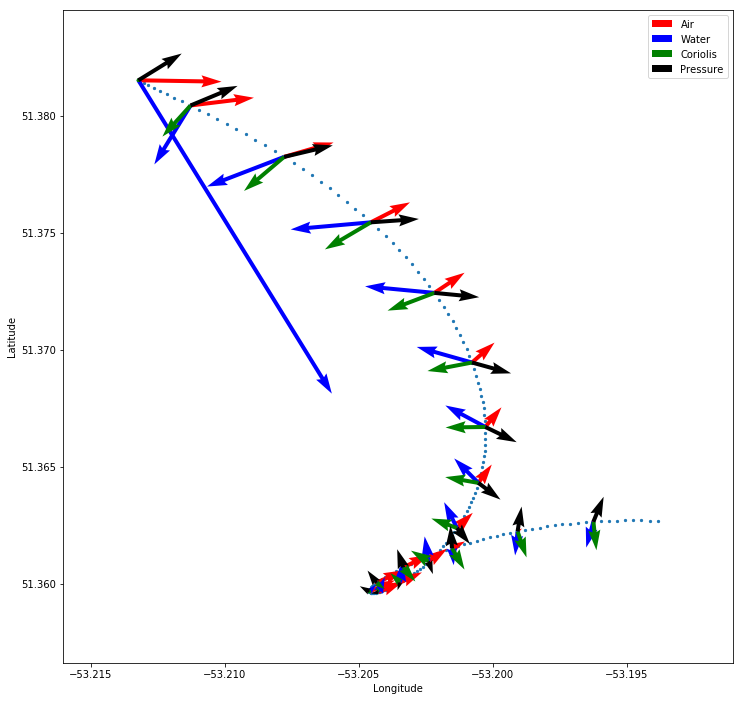

In [33]:
plot.plot_iceberg_track(xds['latitude'].values, xds['longitude'].values, **kwargs)

## No Current, Constant Wind

In [34]:
xds = sim.run_simulation(store_results_as='no_current_constant_wind', 
                         **{'current_constants': (0, 0), 'wind_constants': (10, 0)})

In [35]:
forces = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy'])

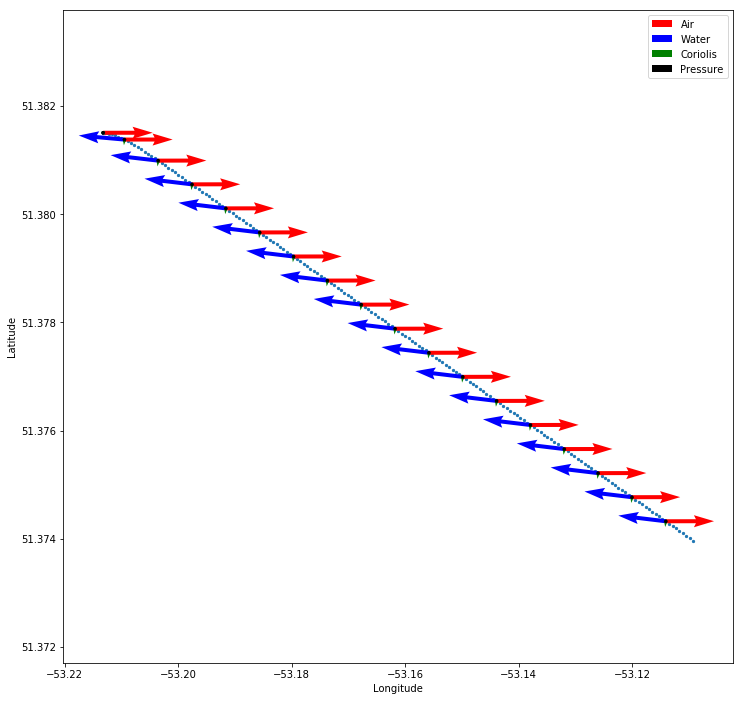

In [36]:
arrow_scale = 1e7
autoscale_figure = False
vectors = [[forces['Fax'], forces['Fay']], [forces['Fwx'], forces['Fwy']],
          [forces['Fcx'], forces['Fcy']], [forces['Fwpx'], forces['Fwpy']]]
kwargs = {'vectors': vectors, 'arrow_colors': arrow_colors, 'arrow_labels': arrow_labels, 
          'autoscale_figure': autoscale_figure, 'arrow_scale': arrow_scale}
plot.plot_iceberg_track(xds['latitude'].values, xds['longitude'].values, **kwargs)

## No Wind, Constant Current

In [37]:
xds = sim.run_simulation(store_results_as='no_wind_constant_current', 
                         **{'current_constants': (0.1, 0), 'wind_constants': (0, 0)})

In [38]:
forces = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy'])

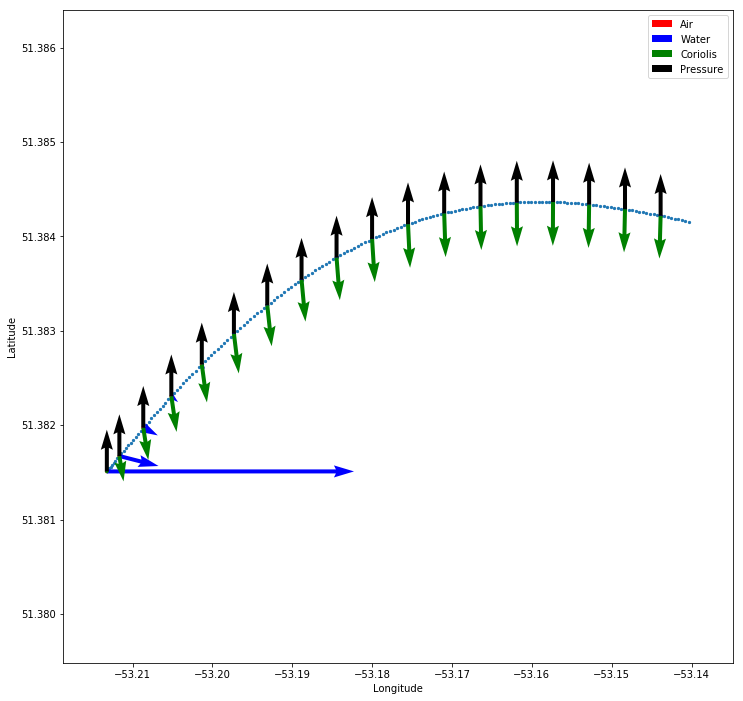

In [39]:
arrow_scale = 1e6
autoscale_figure = False
vectors = [[forces['Fax'], forces['Fay']], [forces['Fwx'], forces['Fwy']],
          [forces['Fcx'], forces['Fcy']], [forces['Fwpx'], forces['Fwpy']]]
kwargs = {'vectors': vectors, 'arrow_colors': arrow_colors, 'arrow_labels': arrow_labels, 
          'autoscale_figure': autoscale_figure, 'arrow_scale': arrow_scale}
plot.plot_iceberg_track(xds['latitude'].values, xds['longitude'].values, **kwargs)

## No Wind or Current

In [40]:
xds = sim.run_simulation(store_results_as='no_wind_or_current', start_velocity=start_velocity, 
                         **{'current_constants': (0, 0), 'wind_constants': (0, 0)})

In [41]:
forces = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy'])

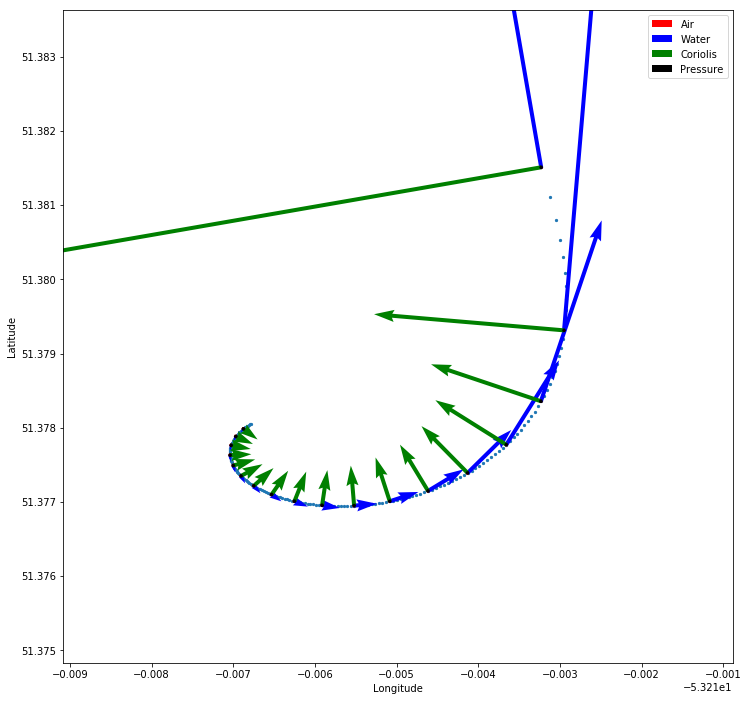

In [42]:
arrow_scale = 1e5
autoscale_figure = False
vectors = [[forces['Fax'], forces['Fay']], [forces['Fwx'], forces['Fwy']],
          [forces['Fcx'], forces['Fcy']], [forces['Fwpx'], forces['Fwpy']]]
kwargs = {'vectors': vectors, 'arrow_colors': arrow_colors, 'arrow_labels': arrow_labels, 
          'autoscale_figure': autoscale_figure, 'arrow_scale': arrow_scale}
plot.plot_iceberg_track(xds['latitude'].values, xds['longitude'].values, **kwargs)

## Constant Current and Wind

In [43]:
xds = sim.run_simulation(store_results_as='constant_current_and_wind', 
                         **{'current_constants': (0.1, 0), 'wind_constants': (10, 0)})

In [44]:
forces = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy'])

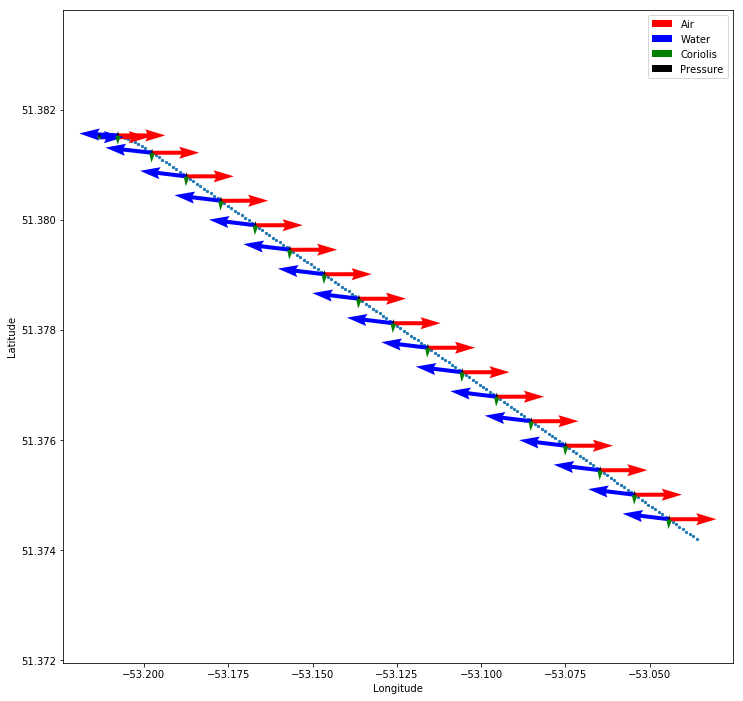

In [45]:
arrow_scale = 1e7
autoscale_figure = False
vectors = [[forces['Fax'], forces['Fay']], [forces['Fwx'], forces['Fwy']],
          [forces['Fcx'], forces['Fcy']], [forces['Fwpx'], forces['Fwpy']]]
kwargs = {'vectors': vectors, 'arrow_colors': arrow_colors, 'arrow_labels': arrow_labels, 
          'autoscale_figure': autoscale_figure, 'arrow_scale': arrow_scale}
plot.plot_iceberg_track(xds['latitude'].values, xds['longitude'].values, **kwargs)